In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import pandas as pd
import numpy as np

In [2]:
filename = '../data/MyD88/24hpi_5_24hpi exp1 myd88 high.csv'
dataframe = pd.read_csv(filename,header=1)

In [3]:
# preview the structure of the data
dataframe[:5]

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,TrackID,ID
0,261.39,141.73,22.08,um,Surface,Position,1,1000003634,3634
1,238.40,134.64,22.01,um,Surface,Position,2,1000003634,5074
2,214.80,121.17,23.01,um,Surface,Position,3,1000003634,5103
3,204.16,110.37,21.98,um,Surface,Position,4,1000003634,5127
4,185.30,101.51,19.32,um,Surface,Position,5,1000003634,5153


In [4]:
# extract the track IDs
trackIDs = np.unique(dataframe['TrackID'])
num_tracks = len(trackIDs)
num_timepoints = len(np.unique(dataframe['Time'].values))
num_tracks, num_timepoints

(17, 60)

In [5]:
reshapeddata = pd.DataFrame({'trackID':dataframe['TrackID'],
                             'time':dataframe['Time'],
                             'x':dataframe['Position X'],
                             'y':dataframe['Position Y'],
                             'z':dataframe['Position Z']})

In [6]:
reshapeddata

,trackID,time,x,y,z
0,1000003634,1,261.39,141.73,22.08
1,1000003634,2,238.40,134.64,22.01
2,1000003634,3,214.80,121.17,23.01
3,1000003634,4,204.16,110.37,21.98
4,1000003634,5,185.30,101.51,19.32
5,1000003634,6,180.38,92.36,17.48
6,1000003634,7,182.75,77.17,18.75
7,1000003634,8,193.54,55.52,21.28
8,1000003634,9,195.90,66.64,21.72
9,1000003634,10,210.38,87.96,21.08


In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [8]:
from inference.walker_inference import BiasedPersistentInferer, prepare_paths

In [9]:
from in_silico.sources import PointSource

(-18.211000000000002, 443.591, 82.4235, 322.5865)

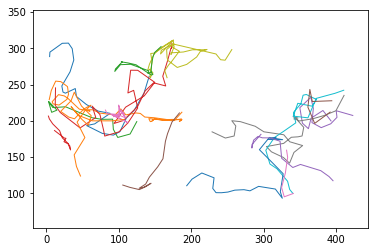

In [14]:
fig1 = plt.figure()
for ID, tracks in reshapeddata.groupby('trackID'):
        plt.plot(tracks['y'], tracks['x'], lw=1)
plt.axis('equal')

In [21]:
fig1.savefig('tracks_myd88high.pdf')

In [16]:
inf = BiasedPersistentInferer(prepare_paths([paths[['x', 'y']].values for id, paths in reshapeddata.groupby('trackID')], include_t=False), PointSource((300, 300)))


In [17]:
out = inf.multi_infer(n_walkers=20, n_steps=20000, burn_in=10000)

Beginning MCMC walk in parallel


Total acceptance Rate: 0.637. Rolling acceptance rate: 0.745:  97%|█████████▋| 28985/30000 [00:16<00:00, 1692.91it/s]
Total acceptance Rate: 0.653. Rolling acceptance rate: 0.725:  96%|█████████▌| 28719/30000 [00:16<00:00, 1724.13it/s]
Total acceptance Rate: 0.592. Rolling acceptance rate: 0.655: 100%|██████████| 30000/30000 [00:16<00:00, 1782.40it/s]
Total acceptance Rate: 0.598. Rolling acceptance rate: 0.650: 100%|█████████▉| 29897/30000 [00:16<00:00, 1827.03it/s]
Total acceptance Rate: 0.598. Rolling acceptance rate: 0.650: 100%|██████████| 30000/30000 [00:16<00:00, 1770.58it/s]
Total acceptance Rate: 0.619. Rolling acceptance rate: 0.665: 100%|█████████▉| 29904/30000 [00:16<00:00, 1757.52it/s]
Total acceptance Rate: 0.619. Rolling acceptance rate: 0.665: 100%|██████████| 30000/30000 [00:16<00:00, 1773.30it/s]
Total acceptance Rate: 0.635. Rolling acceptance rate: 0.775: 100%|██████████| 30000/30000 [00:17<00:00, 1759.06it/s]
Total acceptance Rate: 0.610. Rolling acceptance rate: 0

Completed MCMC walk in 17.50s


In [18]:
from utils.plotting import plot_wpb_dist

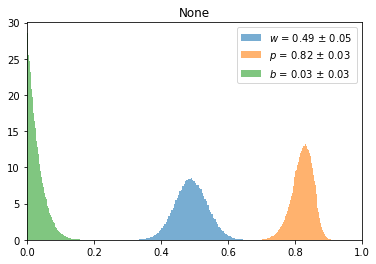

In [20]:
plot_wpb_dist(out,save_as="postis_myd88high.pdf")